In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection-dataset/Fraud_Detection_Dataset.csv


In [2]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [3]:
!gdown --id 1SeNEjdiFu6kS5oMQfvX4uYmSxs8FcaBU

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1SeNEjdiFu6kS5oMQfvX4uYmSxs8FcaBU
From (redirected): https://drive.google.com/uc?id=1SeNEjdiFu6kS5oMQfvX4uYmSxs8FcaBU&confirm=t&uuid=606852f3-2802-4ab5-914d-103e9b47f8fb
To: /kaggle/working/Fraud_Detection_Dataset.csv
100%|███████████████████████████████████████| 1.65G/1.65G [00:08<00:00, 186MB/s]


In [5]:
data1 = pd.read_csv('Fraud_Detection_Dataset.csv')
data1.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [25]:
import pandas as pd
data = data1.copy()

# data = pd.read_csv('/kaggle/input/fraud-detection-dataset/Fraud_Detection_Dataset.csv')
# data.head()

In [26]:
data.shape

(6000000, 32)

In [27]:
data.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [28]:
data.describe()

,Transaction ID,User ID,Transaction Amount,Merchant ID,User Age,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,5.501906e+07,5.499571e+03,5.005515e+02,5.500817e+03,4.900159e+01,5.049328e+04,5.050600e+01,3.049492e+01,5.048393e+01,2.999382e+00,5.749533e+02,1.049685e+01,4.999843e-01
std,2.598067e+07,2.598744e+03,2.884166e+02,2.598350e+03,1.818538e+01,2.858223e+04,2.857562e+01,1.703567e+01,2.886705e+01,1.154479e+00,1.590197e+02,5.764884e+00,5.000000e-01
min,1.000004e+07,1.000000e+03,1.000000e+00,1.000000e+03,1.800000e+01,1.000020e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+02,1.000000e+00,0.000000e+00
25%,3.251666e+07,3.248000e+03,2.507900e+02,3.251000e+03,3.300000e+01,2.573446e+04,2.576000e+01,1.574000e+01,2.500000e+01,2.000000e+00,4.370000e+02,5.000000e+00,0.000000e+00
50%,5.502987e+07,5.499000e+03,5.005100e+02,5.501000e+03,4.900000e+01,5.050294e+04,5.051000e+01,3.050000e+01,5.000000e+01,3.000000e+00,5.750000e+02,1.000000e+01,0.000000e+00
75%,7.752487e+07,7.751000e+03,7.504400e+02,7.752000e+03,6.500000e+01,7.523454e+04,7.525000e+01,4.526000e+01,7.500000e+01,4.000000e+00,7.130000e+02,1.500000e+01,1.000000e+00
max,9.999988e+07,9.999000e+03,1.000000e+03,9.999000e+03,8.000000e+01,1.000000e+05,1.000000e+02,6.000000e+01,1.000000e+02,5.000000e+00,8.500000e+02,2.000000e+01,1.000000e+00


In [29]:
data.columns

Index(['Transaction ID', 'User ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant ID', 'Payment Method',
       'Country Code', 'Transaction Type', 'Device Type', 'IP Address',
       'Browser Type', 'Operating System', 'Merchant Category', 'User Age',
       'User Occupation', 'User Income', 'User Gender', 'User Account Status',
       'Transaction Status', 'Location Distance', 'Time Taken for Transaction',
       'Transaction Time of Day', 'User's Transaction History',
       'Merchant's Reputation Score', 'User's Device Location',
       'Transaction Currency', 'Transaction Purpose', 'User's Credit Score',
       'User's Email Domain', 'Merchant's Business Age',
       'Transaction Authentication Method', 'Fraudulent Flag'],
      dtype='object')

## Feature Engineering

In [30]:
# Create new date-related features
# 

data['Transaction Month'] = pd.to_datetime(data['Transaction Date and Time']).dt.month
data['Transaction Weekday'] = pd.to_datetime(data['Transaction Date and Time']).dt.weekday
data['Transaction Day'] = pd.to_datetime(data['Transaction Date and Time']).dt.day
data['Transaction Dayname'] = pd.to_datetime(data['Transaction Date and Time']).dt.day_name()
data['Transaction Hour'] = pd.to_datetime(data['Transaction Date and Time']).dt.hour
data['Transaction Year'] = pd.to_datetime(data['Transaction Date and Time']).dt.year
data['Age Group'] = pd.cut(data['User Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Elders'])
data['Transaction Date and Time'] = pd.to_datetime(data['Transaction Date and Time'])

data['Transaction Amount Category'] = pd.cut(data['Transaction Amount'], bins=[0, 100, 500, 1000, float('inf')], labels=['Small', 'Medium', 'Large', 'Extra Large'])

# Drop the original datetime column
data = data.drop(columns=['Transaction Date and Time'])

# Drop the original 'Transaction Date and Time' column
#data.drop(columns=['Transaction ID','User ID','Merchant ID'], inplace=True)



In [31]:
data.head()

,Transaction ID,User ID,Transaction Amount,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,...,Transaction Authentication Method,Fraudulent Flag,Transaction Month,Transaction Weekday,Transaction Day,Transaction Dayname,Transaction Hour,Transaction Year,Age Group,Transaction Amount Category
0,51595306,9822,163.08,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,...,Bluetooth Authentication,0,1,0,2,Monday,7,2023,Elders,Medium
1,85052974,4698,430.74,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,...,NFC Tag,1,9,6,12,Sunday,15,2021,Young Adult,Medium
2,23954324,8666,415.74,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,...,Token,1,1,3,12,Thursday,17,2023,Elders,Medium
3,44108303,9012,565.89,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,...,Time-Based OTP,1,2,5,27,Saturday,11,2021,Elders,Large
4,66622683,5185,955.49,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,...,Password,1,9,5,24,Saturday,4,2022,Young Adult,Large


In [33]:
Categorical_feature_names = [ 'Payment Method', 'Country Code', 'Transaction Type', 'Device Type', 'IP Address', 'Browser Type', 'Operating System', 'Merchant Category', 'User Occupation', 'User Gender', 'User Account Status', 'Transaction Status', 'Transaction Time of Day', "User's Device Location", 'Transaction Currency', 'Transaction Amount Category', 'Transaction Purpose', "User's Email Domain", 'Transaction Authentication Method', 'Transaction Dayname','Age Group']
Numerical_feature_names = ['Transaction Amount', 'User Income', 'Location Distance', 'Time Taken for Transaction', "User's Transaction History", "Merchant's Reputation Score", "User's Credit Score", "Merchant's Business Age", 'Fraudulent Flag', 'Transaction Hour', 'Transaction Year', 'Age Group','Transaction Day', 'Transaction Month', 'Transaction Weekday']

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in Categorical_feature_names:
    data[column] = label_encoder.fit_transform(data[column])

# Display the updated DataFrame
data

,Transaction ID,User ID,Transaction Amount,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,...,Transaction Authentication Method,Fraudulent Flag,Transaction Month,Transaction Weekday,Transaction Day,Transaction Dayname,Transaction Hour,Transaction Year,Age Group,Transaction Amount Category
0,51595306,9822,163.08,4044,1,19,6,10,4533349,15,...,5,0,1,0,2,1,7,2023,2,1
1,85052974,4698,430.74,4576,0,38,5,18,4445294,2,...,18,1,9,6,12,3,15,2021,3,1
2,23954324,8666,415.74,4629,20,21,29,34,3779806,21,...,33,1,1,3,12,4,17,2023,2,1
3,44108303,9012,565.89,3322,10,30,22,16,2983424,14,...,32,1,2,5,27,2,11,2021,2,0
4,66622683,5185,955.49,7609,39,13,0,27,1757110,1,...,21,1,9,5,24,2,4,2022,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,61037029,7480,448.99,3346,17,30,31,23,4079262,5,...,26,0,10,2,20,6,15,2021,2,1
5999996,56515851,5636,841.39,8415,3,39,18,5,4670131,26,...,31,1,6,0,14,1,2,2021,0,0
5999997,66863972,5554,197.28,4231,2,5,32,2,5235344,13,...,16,0,11,5,6,2,22,2021,0,1
5999998,13449701,1275,358.33,9614,21,36,13,21,2961750,38,...,0,0,3,6,13,3,15,2022,3,1


In [35]:
data.dtypes

Transaction ID                         int64
User ID                                int64
Transaction Amount                   float64
Merchant ID                            int64
Payment Method                         int64
Country Code                           int64
Transaction Type                       int64
Device Type                            int64
IP Address                             int64
Browser Type                           int64
Operating System                       int64
Merchant Category                      int64
User Age                               int64
User Occupation                        int64
User Income                          float64
User Gender                            int64
User Account Status                    int64
Transaction Status                     int64
Location Distance                    float64
Time Taken for Transaction           float64
Transaction Time of Day                int64
User's Transaction History             int64
Merchant's

In [37]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Label encode categorical features
label_encoder = LabelEncoder()
data['Age Group'] = label_encoder.fit_transform(data['Age Group'])
data['Transaction Amount Category'] = label_encoder.fit_transform(data['Transaction Amount Category'])
data['Transaction Dayname'] = label_encoder.fit_transform(data['Transaction Dayname'])


# Assume 'Fraudulent Flag' is the target variable
X = data.drop('Fraudulent Flag', axis=1)
y = data['Fraudulent Flag']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(
    n_estimators=100,  
    max_depth=3,       
    random_state=42
)

# Fit the model to the training data
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report}')
print(f'Confusion Matrix:\n{confusion_mat}')


Accuracy: 0.4995866666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51    599300
           1       0.50      0.48      0.49    600700

    accuracy                           0.50   1200000
   macro avg       0.50      0.50      0.50   1200000
weighted avg       0.50      0.50      0.50   1200000

Confusion Matrix:
[[312342 286958]
 [313538 287162]]


Top 25 Most Important Features:
                              Feature  Importance
15                        User Gender    0.041717
35                   Transaction Year    0.036483
20            Transaction Time of Day    0.034604
34                   Transaction Hour    0.033194
31                Transaction Weekday    0.031639
17                 Transaction Status    0.030006
13                    User Occupation    0.029902
29  Transaction Authentication Method    0.029423
32                    Transaction Day    0.028910
33                Transaction Dayname    0.028334
19         Time Taken for Transaction    0.027686
11                  Merchant Category    0.027503
23             User's Device Location    0.027484
4                      Payment Method    0.027332
9                        Browser Type    0.027331
27                User's Email Domain    0.026822
36                          Age Group    0.026768
2                  Transaction Amount    0.026660
21         User's 

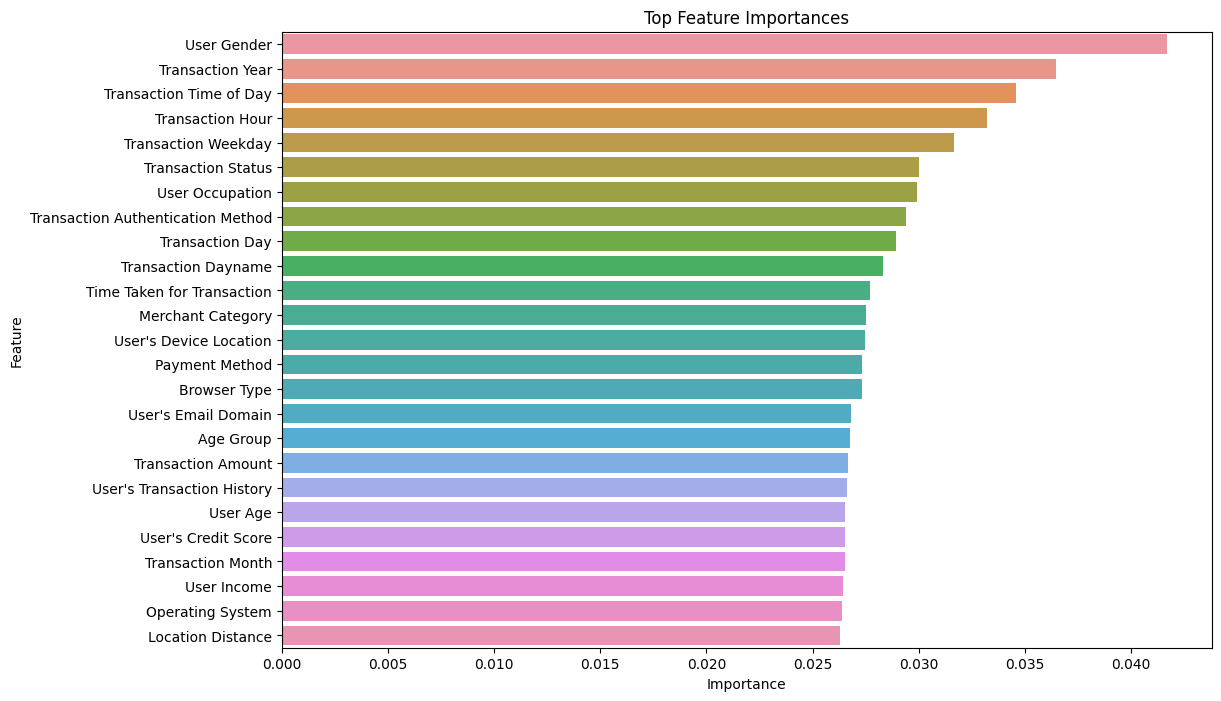

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature importance values
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N most important features (adjust N as needed)
top_n_features = 25
print(f'Top {top_n_features} Most Important Features:')
print(feature_importance_df.head(top_n_features))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n_features), orient='h')
plt.title('Top Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

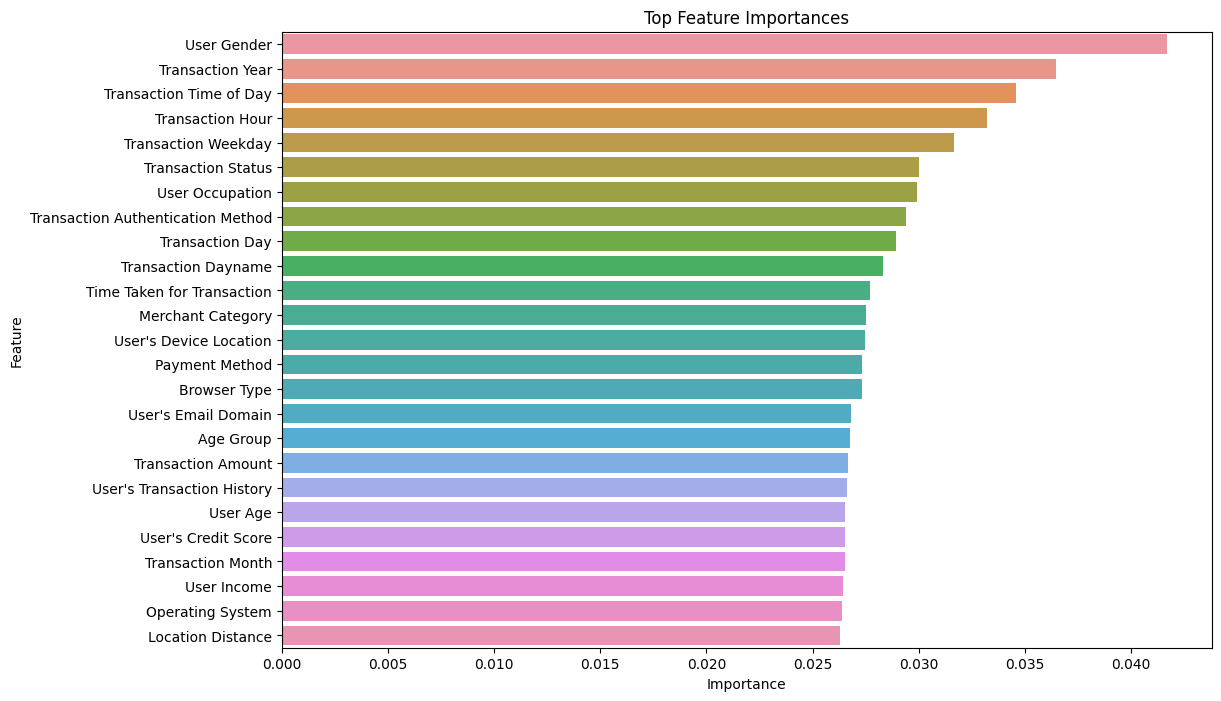

In [39]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n_features), orient='h')
plt.title('Top Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
